In [10]:
import xarray as xr
import numpy as np

# Define the correct level values for the two cases
nz = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 
      90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 220, 240, 
      260, 280, 300, 340, 380, 420, 460, 500, 540, 580, 620, 660, 760, 860, 
      1040, 1180, 1330, 1500, 1700, 1920, 2150, 2400, 2650, 2900, 3150, 3400, 
      3650, 3900, 4150, 4400, 4650, 4900, 5150, 5400, 5650, 6000, 6350]

nz1 = [2.5, 7.5, 12.5, 17.5, 22.5, 27.5, 32.5, 37.5, 42.5, 47.5, 52.5, 57.5, 
       62.5, 67.5, 72.5, 77.5, 82.5, 87.5, 92.5, 97.5, 105, 115, 125, 135, 
       145, 155, 165, 175, 185, 195, 210, 230, 250, 270, 290, 320, 360, 400, 
       440, 480, 520, 560, 600, 640, 710, 810, 950, 1110, 1255, 1415, 1600, 
       1810, 2035, 2275, 2525, 2775, 3025, 3275, 3525, 3775, 4025, 4275, 
       4525, 4775, 5025, 5275, 5525, 5825, 6175]

# Function to revise the level dimension and rename appropriately
def revise_level_dimension(ds):
    for var_name in ds.data_vars:
        var = ds[var_name]
        
        if 'lev' in var.dims:
                # For other variables, first slice off the last level (69th index)
                print(f"Modifying '{var_name}' with 69 levels...")
                ds[var_name] = var.isel(lev=slice(0, 69)).rename({'lev': 'lev'})
                
                # Assign the new 'level1' coordinate with 69 levels
                ds = ds.assign_coords(lev=('lev', nz1))
                
                # Update metadata for the 'level1' dimension
                ds['lev'].attrs['long_name'] = 'depth at layer midpoint'
                ds['lev'].attrs['units'] = 'm'
                ds['lev'].attrs['positive'] = 'down'
                ds['lev'].attrs['axis'] = 'Z'
    
    return ds

In [20]:
import xarray as xr
import pandas as pd

# all Ocean variable names below
#avg_mlotst125  avg_siconc  avg_sisnthick  avg_sithick  avg_siue  avg_sivn  avg_sos  avg_tos  avg_zos

# Define the ocean variable name as a parameter
ocean_var = 'avg_thetao'  # Example: avg_sos, you can change this to any other variable like 'avg_mlotst125'

# Construct the file path (here for Historical run) dynamically using the ocean_var parameter
file_path = f'/work/bm1344/a270228/Phase1_FESOM/Hist/monthly/3d/{ocean_var}/{ocean_var}_*_monthly_mean.nc'

# Open the multiple netcdf files using the dynamic file path
ds = xr.open_mfdataset(file_path)

# Inspect the updated dataset
#ds

ds1 = revise_level_dimension(ds)
#data = ifs_to_latlon(data)
#data
ds1

Modifying 'lev_bnds' with 69 levels...
Modifying 'avg_thetao' with 69 levels...


/tmp/ipykernel_149226/1639887453.py:26: UserWarning: rename 'lev' to 'lev' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  ds[var_name] = var.isel(lev=slice(0, 69)).rename({'lev': 'lev'})


<xarray.Dataset>
Dimensions:     (time: 180, bnds: 2, lon: 1440, lat: 721, lev: 69)
Coordinates:
  * time        (time) datetime64[ns] 1950-01-16 ... 1969-12-16
  * lon         (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * lat         (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lev         (lev) float64 2.5 7.5 12.5 ... 5.525e+03 5.825e+03 6.175e+03
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    lev_bnds    (time, lev, bnds) float64 dask.array<chunksize=(1, 69, 2), meta=np.ndarray>
    avg_thetao  (time, lev, lat, lon) float32 dask.array<chunksize=(1, 69, 721, 1440), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version 2.4.0 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    frequency:    mon
    history:      Sun Oct 20 08:49:04 2024: cdo -f nc -O monmean temp_concat_...
    CDO:          Climate Data Operators version 2.4.0 (https://mpimet.mpg.de...

In [22]:
#lonflip
temp= ds['avg_thetao']
output_dir = '/work/bm1344/a270228/cmpi_hist/fesom/'
years = temp['time'].dt.year.values
years


array([1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950, 1950,
       1950, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951, 1951,
       1951, 1951, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952, 1952,
       1952, 1952, 1952, 1953, 1953, 1953, 1953, 1953, 1953, 1953, 1953,
       1953, 1953, 1953, 1953, 1954, 1954, 1954, 1954, 1954, 1954, 1954,
       1954, 1954, 1954, 1954, 1954, 1960, 1960, 1960, 1960, 1960, 1960,
       1960, 1960, 1960, 1960, 1960, 1960, 1961, 1961, 1961, 1961, 1961,
       1961, 1961, 1961, 1961, 1961, 1961, 1961, 1962, 1962, 1962, 1962,
       1962, 1962, 1962, 1962, 1962, 1962, 1962, 1962, 1963, 1963, 1963,
       1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1963, 1964, 1964,
       1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1964, 1965,
       1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965, 1965,
       1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966, 1966,
       1966, 1967, 1967, 1967, 1967, 1967, 1967, 19

In [19]:
import os
#year=1955
# Loop through each unique year
for year in set(years):
    # Select data for the specific year
    yearly_data = salt.sel(time=str(year))

    # Create the output filename
    output_filename = os.path.join(output_dir, f'salt_{year}.nc')

    # Save the yearly data to a new NetCDF file
    yearly_data.to_netcdf(output_filename)
    print(f'Saved {output_filename}')

Saved /work/bm1344/a270228/cmpi_hist/fesom/salt_1955.nc


In [38]:
#lonflip
salt= ds['avg_so']
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby(ds.lon)
sssm

<xarray.DataArray 'avg_sos' (time: 240, depth: 1, lat: 721, lon: 1440)>
dask.array<getitem, shape=(240, 1, 721, 1440), dtype=float32, chunksize=(12, 1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1950-01-16 1950-02-14T12:00:00 ... 1969-12-16
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * depth    (depth) float64 0.0
Attributes:
    standard_name:  sea_surface_salinity
    long_name:      Time-mean sea surface practical salinity
    units:          g kg**-1
    param:          3.3.10
    cell_methods:   time: mean

In [39]:
sssm_yr=sssm.resample(time="1Y").mean()
sssm_yr
sssm_yr_mean=sssm_yr[10:19].mean('time')
sssm_yr_mean

<xarray.DataArray 'avg_sos' (depth: 1, lat: 721, lon: 1440)>
dask.array<mean_agg-aggregate, shape=(1, 721, 1440), dtype=float32, chunksize=(1, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -180.0 -179.8 -179.5 -179.2 ... 179.2 179.5 179.8
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * depth    (depth) float64 0.0

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'vcenter'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


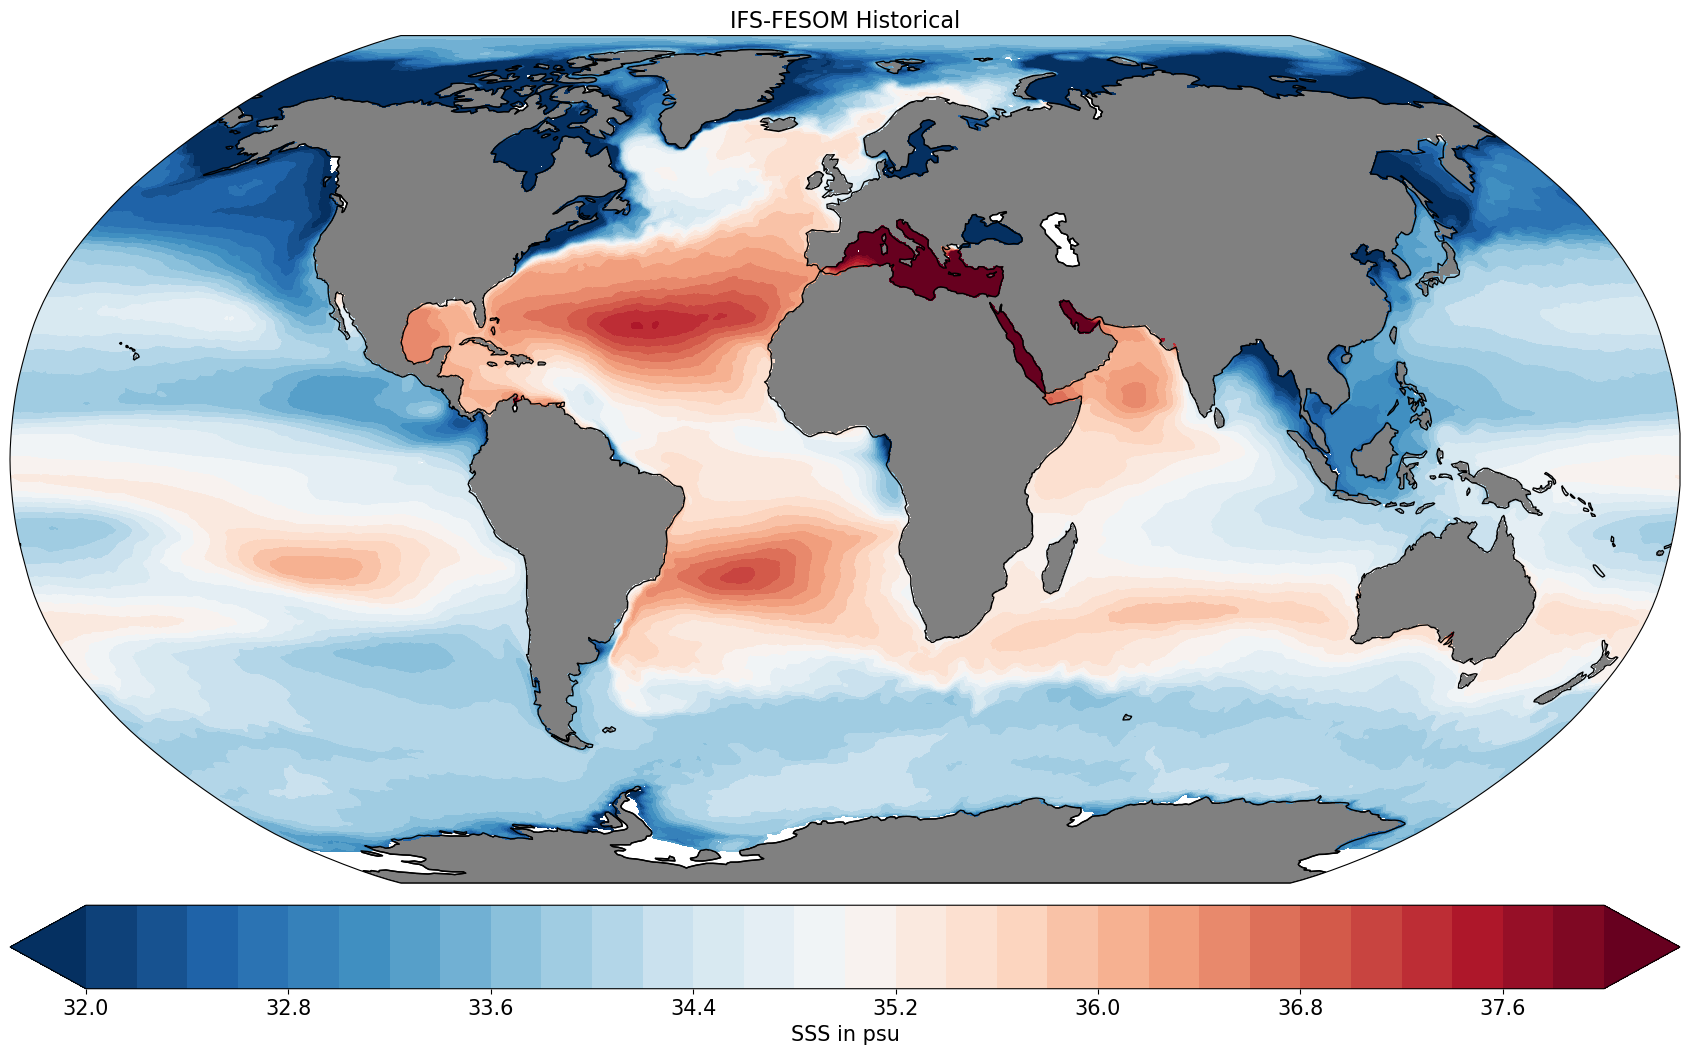

In [40]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean
import cmocean.cm as cmo
import cartopy.crs as ccrs
import cartopy as cart
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

fig = plt.figure(figsize=(17,15))


ax1 = fig.add_subplot(111,
                 projection=ccrs.Robinson())



p1=sssm_yr_mean[0,:,:].plot.contourf(ax=ax1, vmin=32, vcenter=35, vmax=38,levels=31, extend='both', cmap='RdBu_r', add_colorbar=False, transform=ccrs.PlateCarree(), robust='true')

cb = plt.colorbar(p1, extend='both', orientation='horizontal', pad=0.015)
cb.set_label('SSS in psu', fontsize=15)

# Adjust colorbar tick label font size
cb.ax.tick_params(labelsize=15)  # Set the desired font size


ax1.coastlines()
ax1.add_feature(cfeature.LAND, facecolor='gray', edgecolor='k')
ax1.set_title('IFS-FESOM Historical', fontsize=16)


plt.tight_layout()

plt.savefig("IFS-FESOM_SSS_Hist_mean10yr.png",bbox_inches='tight', dpi=300)